# Lab 03. Weather Predict Competition

This lab consists of only one task: train a model to predict if it is going to rain the next day:
- Classification metric is **roc-auc**
- Score should be calculated on a hold-out set (don't use it for training)


#### Evaluation
- Score > 0.860 - 3 points
- Score > 0.865 - 5 points
- Score > 0.870 - 7 points
- Score > 0.875 - 9 points
- Score > 0.880 - 11 points
- Score > 0.885 - 13 points
- Score > 0.890 - 15 points
- You are encouraged to use various methods and tricks to get extra points

#### Do not use any external data or models that were not covered in the course (no gradient boosting and  neural nets).


#### How to submit
- Name your file according to this convention: `2022_lab03_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab03_404_Sheipak_Sviat.ipynb`
    - `2022_lab03_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 22022-11-03 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://github.com/cosmic-research-ml-edu/intro_ml_2022/blob/main/homeworks/hw03/train.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
db_train = pd.read_csv("holdout_data/train.csv")
db_test = pd.read_csv("holdout_data/holdout.csv")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [4]:
target_col = "raintomorrow"
id_cols = ["row_id"]

In [5]:
Y_train = db_train[target_col].values
db_train.drop(columns=[target_col], inplace=True)

Y_test = db_test[target_col].values
db_test.drop(columns=[target_col], inplace=True)

In [6]:
numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

In [7]:
X_train = db_train[numeric_cols].fillna(-9999).values
X_test = db_test[numeric_cols].fillna(-9999).values

In [8]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
roc_auc_score(Y_test, preds)

0.8590878798154512

**Begin**

In [10]:
from matplotlib.pyplot import axes


features_indx = np.arange(len(X_train.T))
features_im = clf.feature_importances_

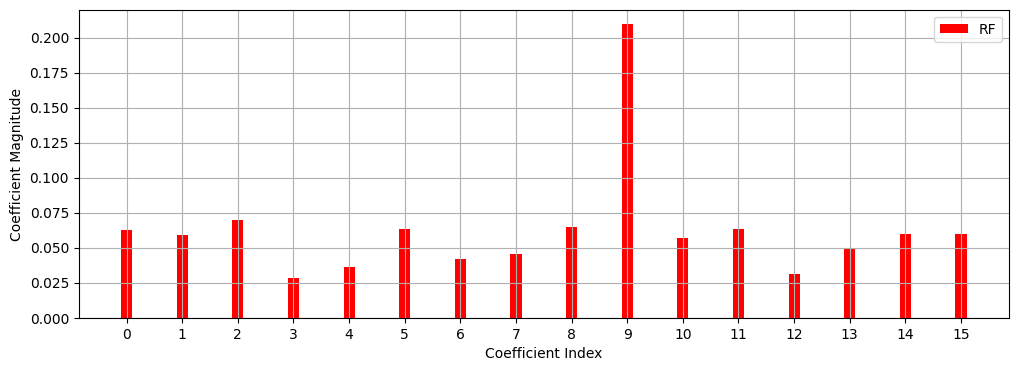

In [12]:
from cProfile import label
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.bar(features_indx, features_im, label="RF", width=0.2, color = 'red')
plt.xticks(features_indx)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [13]:
db_test.head()

,row_id,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday
0,fb4157edd320e344,10.7,12.4,0.4,NaN,NaN,SW,17.0,NaN,WNW,...,6.0,91.0,82.0,1028.2,1025.8,NaN,NaN,11.1,11.6,No
1,872bf995fecb912e,5.6,18.1,2.6,NaN,NaN,WSW,31.0,NW,SW,...,19.0,92.0,47.0,1027.0,1024.9,NaN,NaN,10.8,17.3,Yes
2,568ae84628a4386e,5.1,17.5,0.0,NaN,NaN,ENE,39.0,ENE,E,...,19.0,89.0,64.0,1026.9,1022.8,NaN,NaN,10.0,16.8,No
3,5511c87e12132b3b,10.0,27.8,0.0,NaN,NaN,NW,76.0,N,W,...,44.0,53.0,41.0,1010.1,1003.3,NaN,NaN,16.6,21.8,No
4,f12cb40d27a45c13,6.4,15.8,0.0,NaN,NaN,W,54.0,WSW,W,...,33.0,77.0,58.0,1011.0,1010.1,NaN,NaN,11.3,14.7,No


In [14]:
X_train_cf = (pd.get_dummies(db_train[db_train.columns[1:]]))._get_numeric_data()
X_test_cf = (pd.get_dummies(db_test[db_test.columns[1:]]))._get_numeric_data()

In [99]:
X_train_cf.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,...,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW,raintoday_No,raintoday_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,1,0
2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0
3,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,1,0,0,1,0
4,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,1,0,0,1,0


**Fill NaN with average by column**

In [129]:
col = X_train_cf.columns

X_train_full = X_train_cf[col].fillna(X_train_cf[col].mean())
X_test_full = X_test_cf[col].fillna(X_test_cf[col].mean())

In [127]:
print(X_train_full)

[[13.4 22.9  0.6 ...  0.   1.   0. ]
 [ 7.4 25.1  0.  ...  1.   1.   0. ]
 [17.5 32.3  1.  ...  0.   1.   0. ]
 ...
 [ 7.2 24.1  0.6 ...  0.   1.   0. ]
 [ 6.9 23.4  0.  ...  0.   1.   0. ]
 [11.4 23.9  0.  ...  0.   1.   0. ]]


In [119]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train_full, Y_train)
preds = clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8639886921159933

In [120]:
features_indx = np.arange(len(X_train_full.T))
features_im = clf.feature_importances_

**All features magnitudes**

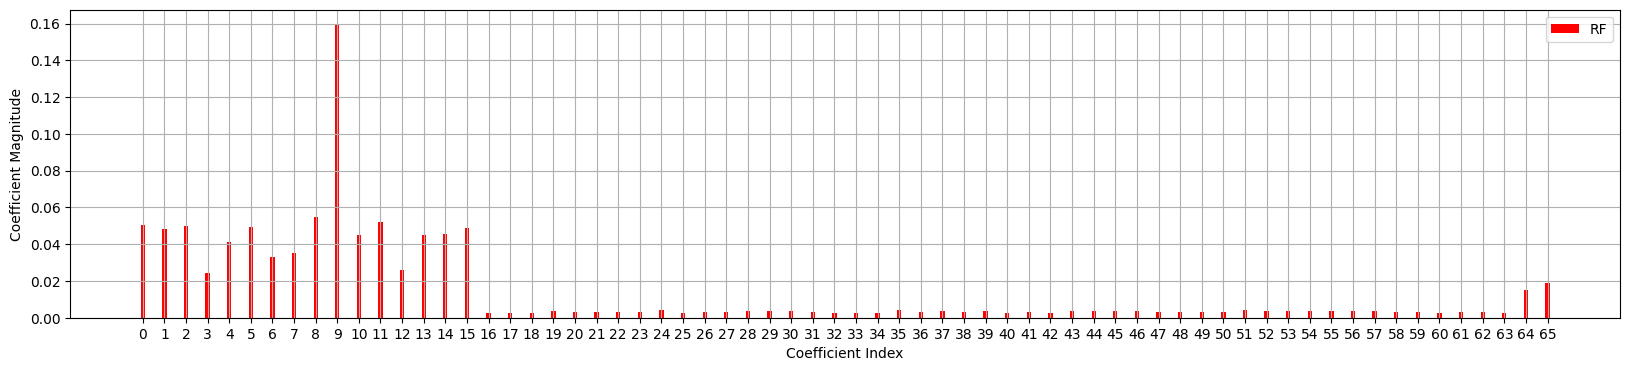

In [121]:
plt.figure(figsize=(20, 4))
plt.bar(features_indx, features_im, label="RF", width=0.2, color = 'red')
plt.xticks(features_indx)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Wright the most significant features**

In [130]:
main_coefs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 64, 65]
main_cols = X_train_full.columns[main_coefs]

In [131]:
print(main_cols)

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm', 'raintoday_No', 'raintoday_Yes'],
      dtype='object')


In [141]:
clf.fit(X_train_full[main_cols], Y_train)
preds = clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8608842695782137

**Random Forest Grid Search**

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

- **Find best hundred** 

In [133]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(100, 2001, 100),
}

In [135]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train_full[main_cols], Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])},
             return_train_score=True)

In [136]:
print(rf_grid_searcher.best_params_)

{'n_estimators': 500}


In [138]:
preds = rf_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8642515246556208

In [142]:
clf = RandomForestClassifier(n_estimators=500, random_state=42)

clf.fit(X_train_full, Y_train)
preds = clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8667887842749721

- **Find the top ten around the best hundred** 

In [150]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(450, 551, 10),
}

In [151]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train_full[main_cols], Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550])},
             return_train_score=True)

In [152]:
print(rf_grid_searcher.best_params_)

{'n_estimators': 510}


In [153]:
preds = rf_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8639376287606143

In [154]:
clf = RandomForestClassifier(n_estimators=510, random_state=42, n_jobs=-1)

clf.fit(X_train_full, Y_train)
preds = clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8668515273576857

**<h1>One of the best scores: `0.8668`<h1>**

- **Find the best number**

In [155]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(500, 521, 2),
}

In [156]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train_full[main_cols], Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([500, 502, 504, 506, 508, 510, 512, 514, 516, 518, 520])},
             return_train_score=True)

In [157]:
print(rf_grid_searcher.best_params_)

{'n_estimators': 502}


In [158]:
preds = rf_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8642696952689525

In [159]:
clf = RandomForestClassifier(n_estimators=502, random_state=42, n_jobs=-1)

clf.fit(X_train_full, Y_train)
preds = clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8667994455713363

**SVC Grid Search**

In [161]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

`RBF` kernel (default)

In [172]:
sv_clf = SVC(probability=True)
sv_clf.fit(X_train_full[main_cols], Y_train)
preds = sv_clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)


0.8505363212190068

`Linear` kernel

In [174]:
sv_clf = SVC(kernel="linear", probability=True)
sv_clf.fit(X_train_full[main_cols], Y_train)

SVC(kernel='linear', probability=True)

In [175]:
preds = sv_clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8642270114089021

`Poly` kernel

In [177]:
sv_clf = SVC(kernel="poly", probability=True)
sv_clf.fit(X_train_full[main_cols], Y_train)


SVC(kernel='poly', probability=True)

In [178]:
preds = sv_clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8537485427413047

`Sigmoid` kernel

In [179]:
sv_clf = SVC(kernel="sigmoid", probability=True)
sv_clf.fit(X_train_full[main_cols], Y_train)

SVC(kernel='sigmoid', probability=True)

In [180]:
preds = sv_clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.7365541070974788

- **Next let's use linear kernel as the best SVC model**

Linear kernek with `all` features

In [181]:
sv_clf = SVC(kernel="linear", probability=True)
sv_clf.fit(X_train_full, Y_train)

SVC(kernel='linear', probability=True)

In [182]:
preds = sv_clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8594577185104237

- **Grid Search `C` from 1 to 100 for SVC**

In [183]:
sv_clf = SVC(kernel="linear", probability=True)
sv_grid = {
    "C": np.arange(1, 101, 3),
}

In [184]:
sv_grid_searcher = GridSearchCV(sv_clf, param_grid=sv_grid, n_jobs=-1, cv=5, return_train_score=True)
sv_grid_searcher.fit(X_train_full[main_cols], Y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True), n_jobs=-1,
             param_grid={'C': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100])},
             return_train_score=True)

In [185]:
print(sv_grid_searcher.best_params_)

{'C': 4}


In [186]:
preds = sv_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8642879496772374

- **Let's see visualisation of results**

In [187]:
means = sv_grid_searcher.cv_results_["mean_test_score"]
stds = sv_grid_searcher.cv_results_["std_test_score"]

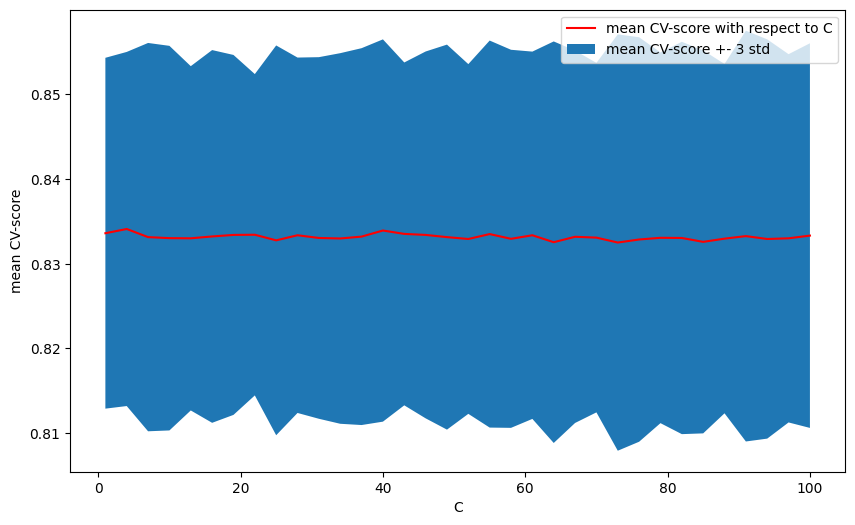

In [188]:
plt.figure(figsize=(10, 6))
xs = sv_grid_searcher.param_grid["C"]
plt.plot(xs, sv_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to C")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("C")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

- **And try model with the best C=`4` for all features**

In [189]:
sv_clf = SVC(kernel="linear", C=4, probability=True)
sv_clf.fit(X_train_full, Y_train)

SVC(C=4, kernel='linear', probability=True)

In [190]:
preds = sv_clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8603549626413737

- **Grid Search `C` from [0.25; 0.5; 0.75] for SVC**

In [191]:
sv_clf = SVC(kernel="linear", probability=True)
sv_grid = {
    "C": np.arange(0, 1, 0.25),
}

In [192]:
sv_grid_searcher = GridSearchCV(sv_clf, param_grid=sv_grid, n_jobs=-1, cv=5, return_train_score=True)
sv_grid_searcher.fit(X_train_full[main_cols], Y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\timo2\AppData\Local\Programs\Python\Python310\

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True), n_jobs=-1,
             param_grid={'C': array([0.  , 0.25, 0.5 , 0.75])},
             return_train_score=True)

In [193]:
print(sv_grid_searcher.best_params_)

{'C': 0.25}


In [194]:
preds = sv_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8636982394706098

**We have two models:**
  - Random Forest(n_estimators=510) with score `0.8668` on the all features
  - SVC(kernel="linear", C=4) with score `0.86428` on the main features

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train_full_new, X_val_full, Y_train_new, Y_val = train_test_split(X_train_full, Y_train, test_size= 15/100, 
                                                    shuffle=True, stratify= Y_train,
                                                    random_state=42)
print(X_val_full.shape, Y_val.shape)

(7500, 66) (7500,)


In [314]:
main_coefs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 64, 65]
other_coefs = np.arange(16, 66)
main_cols = X_train_full.columns[main_coefs]
other_cols = X_train_full.columns[other_coefs]

In [315]:
rf_clf = RandomForestClassifier(n_estimators=510, n_jobs=-1)
rf_clf.fit(X_train_full_new, Y_train_new)


RandomForestClassifier(n_estimators=510, n_jobs=-1)

In [316]:
preds = rf_clf.predict_proba(X_val_full)[:, 1]
roc_auc_score(Y_val, preds)

0.8731785547785549

In [317]:
sv_clf = SVC(kernel="linear", C=4, probability=True)
sv_clf.fit(X_train_full_new[main_cols], Y_train_new)

SVC(C=4, kernel='linear', probability=True)

In [318]:
preds = sv_clf.predict_proba(X_val_full[main_cols])[:, 1]
roc_auc_score(Y_val, preds)

0.8522826210826211

**Merge SVC and Random Forest**

In [319]:
a_grid = np.arange(0, 1.01, 0.01)

In [320]:
def merge_clf_predict_proba(a, x_val):
    return (a * sv_clf.predict_proba(x_val[main_cols])[:, 1] + (1 - a) * rf_clf.predict_proba(x_val)[:, 1])

In [321]:
best_score = 0
best_a = 0
for a in a_grid:
    preds = merge_clf_predict_proba(a, X_val_full)
    ras = roc_auc_score(Y_val, preds)
    if ras > best_score:
        best_score = ras
        best_a = a

In [322]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.874 with alpha 0.15


In [324]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8681300772006773

**<h2>New best score: `0.8681`<h2>**

Ok, I think it's better to scale data for SVC :D

In [325]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [326]:
sv_clf_scl = make_pipeline(StandardScaler(), SVC(kernel="linear", C=4, probability=True))
sv_clf_scl.fit(X_train_full_new, Y_train_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=4, kernel='linear', probability=True))])

In [351]:
preds = sv_clf_scl.predict_proba(X_val_full)[:, 1]
print("Validation score", roc_auc_score(Y_val, preds))

Validation score 0.8549729603729603


In [356]:
preds = sv_clf_scl.predict_proba(X_test_full)[:, 1]
print("Test score", roc_auc_score(Y_test, preds))

Test score 0.8585124921000697


- **Try to merge again**

In [357]:
a_grid = np.arange(0, 1.01, 0.01)

In [358]:
def merge_clf_predict_proba(a, x_val):
    return (a * sv_clf_scl.predict_proba(x_val)[:, 1] + (1 - a) * rf_clf.predict_proba(x_val)[:, 1])

In [359]:
best_score = 0
best_a = 0
for a in a_grid:
    preds = merge_clf_predict_proba(a, X_val_full)
    ras = roc_auc_score(Y_val, preds)
    if ras > best_score:
        best_score = ras
        best_a = a

In [362]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.875 with alpha 0.22


In [367]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8683340212254422

The same score

**Logistic Regression**

In [368]:
from sklearn.linear_model import LogisticRegression

In [374]:
lr_clf = LogisticRegression(solver="saga", penalty='l1')
lr_clf.fit(X_train_full[main_cols], Y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [375]:
preds = lr_clf.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8518132660663545

All features

In [377]:
lr_clf = LogisticRegression(solver="saga", penalty='l1')
lr_clf.fit(X_train_full, Y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [378]:
preds = lr_clf.predict_proba(X_test_full)[:, 1]
roc_auc_score(Y_test, preds)

0.8520307848735518

- **Grid Search for `C` from 0 to 1**

In [384]:
lr_clf = LogisticRegression(solver="saga", penalty='l1')
lr_grid = {
    "C": np.arange(0, 1, 0.05),
}

In [385]:
lr_grid_searcher = GridSearchCV(lr_clf, param_grid=lr_grid, n_jobs=-1, cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train_full[main_cols], Y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             return_train_score=True)

In [388]:
print(lr_grid_searcher.best_params_)

{'C': 0.9500000000000001}


In [389]:
preds = sv_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8636982394706098

- **Grid Search for `C` from 1 to 100**

In [392]:
lr_clf = LogisticRegression(solver="saga", penalty='l1')
lr_grid = {
    "C": np.arange(1, 100, 1),
}

In [393]:
lr_grid_searcher = GridSearchCV(lr_clf, param_grid=lr_grid, n_jobs=-1, cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train_full[main_cols], Y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True)

In [396]:
print(lr_grid_searcher.best_params_)

{'C': 20}


In [397]:
preds = sv_grid_searcher.best_estimator_.predict_proba(X_test_full[main_cols])[:, 1]
roc_auc_score(Y_test, preds)

0.8636982394706098

The same result again

**Let's see visualisation of results**

In [400]:
means = lr_grid_searcher.cv_results_["mean_test_score"]
stds = lr_grid_searcher.cv_results_["std_test_score"]

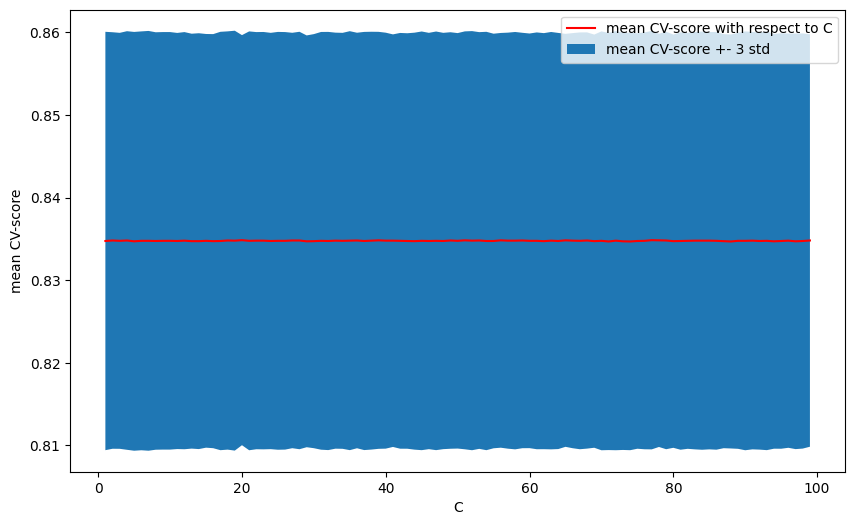

In [401]:
plt.figure(figsize=(10, 6))
xs = lr_grid_searcher.param_grid["C"]
plt.plot(xs, lr_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to C")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("C")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

**<h1>Oh, my. Excellent results!</h1>**

**Try to merge three models**

In [454]:
lr_clf = LogisticRegression(solver="saga", penalty='l1', C=0.7)
lr_clf.fit(X_train_full_new, Y_train_new)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.7, penalty='l1', solver='saga')

In [455]:
preds = lr_clf.predict_proba(X_val_full)[:, 1]
roc_auc_score(Y_val, preds)

0.8410533022533022

In [456]:
preds = sv_clf_scl.predict_proba(X_val_full)[:, 1]
roc_auc_score(Y_val, preds)

0.8549729603729603

In [440]:
preds = rf_clf.predict_proba(X_val_full)[:, 1]
roc_auc_score(Y_val, preds)

0.8731785547785549

In [441]:
def merge_clf_predict_proba(a, x_val):
    if(np.array(a).sum != 0):
        return ((a[0] * sv_clf_scl.predict_proba(x_val)[:, 1] + a[1] * rf_clf.predict_proba(x_val)[:, 1] + a[2] * lr_clf.predict_proba(x_val)[:, 1]) / (a[0] + a[1] + a[2]))    

**SV and RF**

In [420]:
best_score = 0
best_a = [1, 1, 0]
for i in range(0, 11, 1):
    for j in range(0, 11, 1):
        a = [i, j, 0]
        if(i != 0 | j != 0):
            preds = merge_clf_predict_proba(a, X_val_full)
            ras = roc_auc_score(Y_val, preds)
            if ras > best_score:
                best_score = ras
                best_a = a

In [423]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.875 with alpha [2, 7, 0]


In [422]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8683531006917288

**<h3>New best score: `0.8683`<h3>**

**SV and LR**

In [424]:
best_score = 0
best_a = [1, 0, 1]
for i in range(0, 11, 1):
    for j in range(0, 11, 1):
        a = [i, 0, j]
        if(i != 0 | j != 0):
            preds = merge_clf_predict_proba(a, X_val_full)
            ras = roc_auc_score(Y_val, preds)
            if ras > best_score:
                best_score = ras
                best_a = a

In [426]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.855 with alpha [10, 0, 1]


In [427]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8587756082533853

**RF and LR**

In [442]:
best_score = 0
best_a = [0, 1, 1]
for i in range(0, 11, 1):
    for j in range(0, 11, 1):
        a = [0, i, j]
        if(i != 0 | j != 0):
            preds = merge_clf_predict_proba(a, X_val_full)
            ras = roc_auc_score(Y_val, preds)
            if ras > best_score:
                best_score = ras
                best_a = a

In [443]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.873 with alpha [0, 10, 1]


In [444]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8666745459705818

**SV + RF and LR with weight=2**

In [445]:
best_score = 0
best_a = [1, 1, 2]
for i in range(0, 11, 1):
    for j in range(0, 11, 1):
        a = [i, j, 2]
        if(i != 0 | j != 0):
            preds = merge_clf_predict_proba(a, X_val_full)
            ras = roc_auc_score(Y_val, preds)
            if ras > best_score:
                best_score = ras
                best_a = a

In [446]:
print("The best score is", round(best_score, 3), "with alpha", best_a)

The best score is 0.874 with alpha [2, 10, 2]


In [451]:
preds = merge_clf_predict_proba(best_a, X_test_full)
roc_auc_score(Y_test, preds)

0.8681867096975668

**Exsperiments**

In [479]:
main_coefs_new = [9]
main_cols_new = X_train_full.columns[main_coefs_new]

In [469]:
rf_clf_2 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf_2.fit(X_train_full[main_cols_new], Y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [470]:
preds = rf_clf_2.predict_proba(X_test_full[main_cols_new])[:, 1]
roc_auc_score(Y_test, preds)

0.7836331091341346

**Data modification**  
- Trying to use regression for replacing NaN

In [502]:
from sklearn.linear_model import LinearRegression

In [503]:
columns = X_train_full.columns

X_train_mod = X_train_full
lreg = LinearRegression(n_jobs=-1)
for col in columns:
    lreg.fit(X_train_mod.drop(columns=col), X_train_mod[col])
    X_train_mod[col] = lreg.predict(X_train_mod.drop(columns=col))

X_test_mod = X_test_full
lreg = LinearRegression(n_jobs=-1)
for col in columns:
    lreg.fit(X_test_mod.drop(columns=col), X_test_mod[col])
    X_test_mod[col] = lreg.predict(X_test_mod.drop(columns=col))

In [504]:
rf_clf_3 = RandomForestClassifier(n_estimators=510, n_jobs=-1)
rf_clf_3.fit(X_train_mod, Y_train)

RandomForestClassifier(n_estimators=1500, n_jobs=-1)

In [510]:
preds = rf_clf_3.predict_proba(X_test_mod)[:, 1]
roc_auc_score(Y_test, preds)

0.842163793763139

In [511]:
from sklearn.linear_model import Ridge

In [516]:
columns = X_train_full.columns

X_train_mod = X_train_full
lreg = Ridge(alpha=0.5)
for col in columns:
    lreg.fit(X_train_mod.drop(columns=col), X_train_mod[col])
    X_train_mod[col] = lreg.predict(X_train_mod.drop(columns=col))

X_test_mod = X_test_full
lreg = Ridge(alpha=0.5)
for col in columns:
    lreg.fit(X_test_mod.drop(columns=col), X_test_mod[col])
    X_test_mod[col] = lreg.predict(X_test_mod.drop(columns=col))

In [517]:
rf_clf_3 = RandomForestClassifier(n_estimators=510, n_jobs=-1)
rf_clf_3.fit(X_train_mod, Y_train)

RandomForestClassifier(n_estimators=510, n_jobs=-1)

In [518]:
preds = rf_clf_3.predict_proba(X_test_mod)[:, 1]
roc_auc_score(Y_test, preds)

0.835138379759347

**Well, it is not enough again :(**

**<h3>The result of this whole story is the best score: `0.8683`<h3>**